# Ejercicios Tema 4

---

`Ejercicio 10 - para casa`

> *Considerar la dinámica de las opiniones públicas sobre ideologías políticas. Para simplificar, supongamos que solo hay tres opciones: conservador, progresista y neutral. Los conservadores y los progresistas son igualmente atractivos para la gente, sin una asimetría fundamental entre ellos. La popularidad de las ideologías conservadora y progresista se puede representar mediante dos variables, $p_c$ y $p_p$, respectivamente teniendo en cuenta que $0 \leq p_c \leq 1; 0 \leq p_p \leq 1; 0 \leq p_c + p_p \leq 1$.
Esto implica que $1 - p_c - p_p = p_n$ representa la popularidad de neutral.*
*Suponer que en cada encuesta electoral, la gente cambia sus estados ideológicos entre las tres opciones de acuerdo con su popularidad relativa en la encuesta anterior. Por ejemplo, la tasa de cambio de la opción $X$ a la opción $Y$ puede considerarse proporcional a $(p_Y - p_X)$ si $p_Y > p_X$, o $0$ en caso contrario. Se deben considerar seis casos diferentes de tales comportamientos de cambio: de conservador a progresista, de conservador a neutral, de progresista a conservador, de progresista a neutral, de neutral a conservador y de neutral a progresista y representarlos en ecuaciones dinámicas. Completar un modelo matemático de tiempo discreto que describa este sistema y simule su comportamiento. Comprobar los  posibles resultados finales después de un período de tiempo suficientemente largo.*

---

### Solución

Este ejercicio trata de crear un sistema dinamico en tiempo discreto, en que simular las ideas politicas de la poblacion.
Para la simulación el primer paso es el de analizar todas las variables que intervienen en el sistema, las cuales son:
- Popularidad de la ideología conservadora: $P_c$
- Popularidad de la ideología progresista: $P_p$
- Popularidad de la ideología neutral: $P_n$

$$ Población = P_p + P_c + P_n = 1$$ 

Las ecuaciones sobre las cuales se rige el sistema son las siguientes:

$$ P_c(t) = P_c(t-1) + GananciaVotantes() - PerdidaVotantes() $$
$$ P_p(t) = P_p(t-1) + GananciaVotantes() - PerdidaVotantes() $$
$$ P_n(t) = P_n(t-1) + GananciaVotantes() - PerdidaVotantes() $$

Donde las formulas de Ganancias y Perdidas de votantes vienen dadas por la tasa de cambio de una ídea política a otra tal cual se indica en el enunciado $(p_Y - p_X)$ si $p_Y > p_X$, o $0$ en caso contrario, tasa la cual he multiplicado por una constante $r$ para suavizar el cambio de votantes.

En la siguiente porción de código he simulado el sistema, en la que la población es igual a 100 para una mejor visualización y en la que he simulado 5 diferentes casos iniciales.

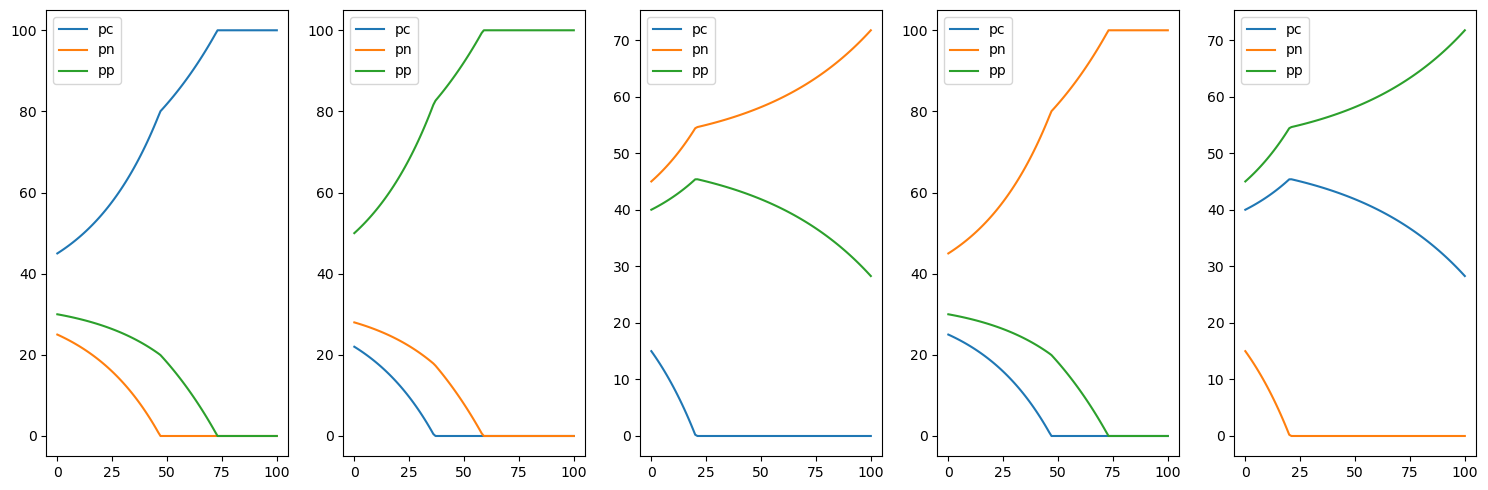

In [14]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

from pylab import *
import matplotlib.pyplot as plt


def inicializacion(valor_pc, valor_pp):
    global pc, pp, pn, pcresult, ppresult, pnresult
    pc = valor_pc
    pp = valor_pp
    pn = 100 - pc - pp
    pcresult = [pc]
    ppresult = [pp]
    pnresult = [pn]

def observacion():
    global pc, pp, pn, pcresult, ppresult, pnresult
    pcresult.append(pc)
    ppresult.append(pp)
    pnresult.append(pn)

r = 0.01

def tasa_de_cambio(X, Y):
    global tasa
    if Y > X:
        tasa = (Y - X) * r
        if tasa < 0:
            return 0
        else:
            return tasa
    else:
        return 0


def actualizacion():
    global pc, pp, pn, pcresult, ppresult, pnresult
    tasa_pp_pn = tasa_de_cambio(pp, pn)
    tasa_pp_pc = tasa_de_cambio(pp, pc)

    tasa_pn_pp = tasa_de_cambio(pn, pp)
    tasa_pn_pc = tasa_de_cambio(pn, pc)

    tasa_pc_pp = tasa_de_cambio(pc, pp)
    tasa_pc_pn = tasa_de_cambio(pc, pn)

    nuevo_pp = max(0, pp + tasa_pn_pp + tasa_pc_pp - tasa_pp_pc - tasa_pp_pn)
    nuevo_pn = max(0, pn + tasa_pp_pn + tasa_pc_pn - tasa_pn_pc - tasa_pn_pp)
    nuevo_pc = max(0, pc + tasa_pp_pc + tasa_pn_pc - tasa_pc_pn - tasa_pc_pp)

    pp, pn, pc = nuevo_pp, nuevo_pn, nuevo_pc

    # Para asegurar que ningún partido pueda tener mas del 100% de la población
    total = pp + pn + pc
    if total != 100:
        pp *= 100 / total
        pn *= 100 / total
        pc *= 100 / total

inicializaciones = [(45, 30), (22, 50), (15, 40), (25, 30), (40, 45)]
num_graficos = len(inicializaciones)

fig, axs = plt.subplots(1, num_graficos, figsize=(15, 5))

for i, (pc_val, pp_val) in enumerate(inicializaciones):
    inicializacion(pc_val, pp_val)
    for t in range(100):
        actualizacion()
        observacion()

    axs[i].plot(pcresult, label='pc')
    axs[i].plot(pnresult, label='pn')
    axs[i].plot(ppresult, label='pp')
    axs[i].legend(loc='best')

plt.tight_layout()

plt.show()

### Conclusión

Como se puede observar en los gráficos generados según diferentes inicializaciones de votantes iniciales, la opción politica que desde el instante $t$ inicial es la que tiene mas popularidad/afiliados es la que finalmente se acercará a la totalidad de la población.

---

`Ejercicio 11 - para casa`

> *Revisar el modelo del ejercicio anterior para que los partidos políticos de las dos ideologías (conservador y progresista) realicen una campaña política para promover el cambio de los votantes a sus ideologías desde sus competencias, a una tasa inversamente proporcional a su popularidad actual. Es decir, cuanto menos populares sean, más intensa será su campaña. Simular el comportamiento de este modelo revisado y ver cómo esa campaña política cambia la dinámica del sistema.*

---

### Solución

En esta segunda parte del ejercicio los partidos Progresista y Conservador realizan una campaña politica para obtener mas votantes. 

Para simular esto he creado una nueva función actualización, en la que el partido con menos votantes obtiene una ligera ganancia de votantes y a diferencia de el ejercicio anterior, neutro no gana votantes.

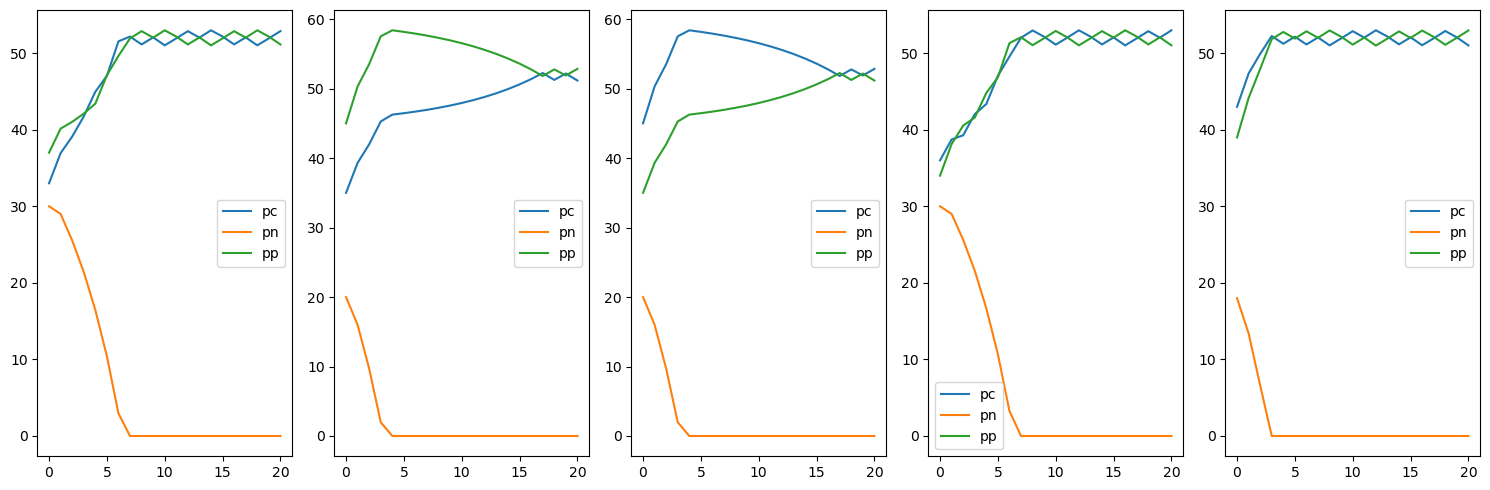

In [15]:
r = 0.1

ganancias_campaña = 1

def actualizacion2():
    global pc, pp, pn, pcresult, ppresult, pnresult
    
    tasa_pp_pc = tasa_de_cambio(pp, pc)

    tasa_pn_pp = tasa_de_cambio(pn, pp)
    tasa_pn_pc = tasa_de_cambio(pn, pc)

    tasa_pc_pp = tasa_de_cambio(pc, pp)

    nuevo_pp = max(0, pp + tasa_pn_pp + tasa_pc_pp - tasa_pp_pc)
    nuevo_pn = max(0, pn - tasa_pn_pc - tasa_pn_pp)
    nuevo_pc = max(0, pc + tasa_pp_pc + tasa_pn_pc - tasa_pc_pp)

    pp, pn, pc = nuevo_pp, nuevo_pn, nuevo_pc

    total = pp + pn + pc
    if total != 100:
        pp *= 100 / total
        pn *= 100 / total
        pc *= 100 / total

    # CAMPAÑA
    if(pp > pc):
        if pc != 0:
            pp = pp - ganancias_campaña + (100/pc)
            pc = pc + ganancias_campaña + (100/pc)
    elif(pc > pp):
        if pp != 0:
            pc = pc - ganancias_campaña + (100/pp)
            pp = pp + ganancias_campaña + (100/pp)


inicializaciones = [(33, 37), (35, 45), (45, 35), (36, 34), (43, 39)]
num_graficos = len(inicializaciones)

fig, axs = plt.subplots(1, num_graficos, figsize=(15, 5))

for i, (pc_val, pp_val) in enumerate(inicializaciones):
    inicializacion(pc_val, pp_val)
    for t in range(20):
        actualizacion2()
        observacion()

    axs[i].plot(pcresult, label='pc')
    axs[i].plot(pnresult, label='pn')
    axs[i].plot(ppresult, label='pp')
    axs[i].legend(loc='best')

plt.tight_layout()

plt.show()


### Conclusión

Como se observa en este nuevo caso, el partido neutro pierde votantes y los partidos conservadores y progresistas ganan votantes dependiendo de su popularidad y convergen cerca del 50% de los votantes, donde en cada iteración se turnan el primer lugar.